# PART 1: 

## HOW TO CLEAN DATA WITH PYTHON
### Cleaning US Census Data
You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple csv files. They didn’t use pandas, they would just look through these csv files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into pandas and into reasonable shape so that you can make these histograms?

#### Inspect the Data!


1.
The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

Open some of the census csv files in the navigator. How are they named? What kind of information do they hold? Will they help us make this graph?

2.
It will be easier to inspect this data once we have it in a DataFrame. You can’t even call .head() on these csvs! How are you supposed to read them?

Using glob, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like us_census.

In [455]:
import glob
import pandas as pd 
import numpy as np

In [456]:
us_census = pd.DataFrame([])

for csv_file in glob.glob('Assignment/states*'):
   us_census = pd.concat( ( us_census , pd.read_csv(str(csv_file)) ) , ignore_index = True)
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [457]:
us_census = us_census.drop(us_census.columns[0], axis = 1)

3.
Look at the .columns and the .dtypes of the us_census DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [458]:
us_census.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [459]:
us_census.dtypes

State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object

4.
Look at the .head() of the DataFrame so that you can understand why some of these dtypes are objects instead of integers or floats.

Start to make a plan for how to convert these columns into the right types for manipulation.

In [460]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


REgex to the rescue
5.
Use regex to turn the Income column into a format that is ready for conversion into a numerical type.


In [461]:
import re

pattern = re.compile(r'[$]')

us_census['Income'] = us_census['Income'].str.replace(pattern , '')

In [462]:
us_census['Income'] = pd.to_numeric(us_census['Income'])

6.
Look at the GenderPop column. We are going to want to separate this into two columns, the Men column, and the Women column.

Split the column into those two new columns using str.split and separating out those results.


In [463]:
us_census[['Men' , 'Women']] = us_census['GenderPop'].str.split('_', expand = True)

In [464]:
us_census.drop('GenderPop' , axis = 1 , inplace = True)

7.
Convert both of the columns into numerical datatypes.

There is still an M or an F character in each entry! We should remove those before we convert.

In [465]:
us_census['Men'] = us_census['Men'].str.replace('M' , '')
us_census['Women'] = us_census['Women'].str.replace('F' , '')

In [466]:
us_census['Men'] = pd.to_numeric(us_census['Men'])
us_census['Women'] = pd.to_numeric(us_census['Women'])

8.
Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you’ve wasted your whole day cleaning your data with no results to show!

Use matplotlib to make a scatterplot!

plt.scatter(the_women_column, the_income_column) 
Remember to call plt.show() to see the graph!

In [467]:
import matplotlib.pyplot as plt

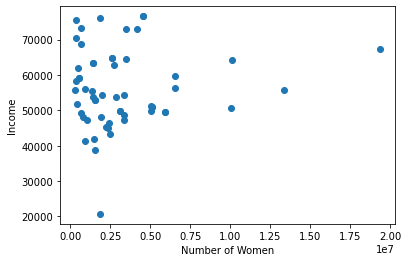

In [468]:
plt.scatter(us_census['Women'] , us_census['Income'])
plt.xlabel('Number of Women')
plt.ylabel('Income')
plt.show()

9.
Did you get an error? These monstrous csv files probably have nan values in them! Print out your column with the number of women per state to see.

We can fill in those nans by using pandas’ .fillna() function.

You have the TotalPop per state, and you have the Men per state. As an estimate for the nan values in the Women column, you could use the TotalPop of that state minus the Men for that state.

Print out the Women column after filling the nan values to see if it worked!

In [469]:
us_census['Women'].fillna(us_census['TotalPop'] - us_census['Men'], axis = 0 , inplace = True)

In [470]:
us_census['Women']

0      2489527.0
1       349215.0
2      3342840.0
3      1506295.0
4     19334329.0
5      2630239.0
6      2630239.0
7      1841615.0
8       478041.0
9       340810.0
10    10045763.0
11     5123362.0
12     5123362.0
13      696428.0
14      806083.0
15     6556862.0
16     3333382.0
17     1558931.0
18     1558931.0
19     1453125.0
20     2233145.0
21     2364097.0
22      679019.0
23     3057895.0
24     3057895.0
25     3455936.0
26     5038598.0
27     2727005.0
28     1536358.0
29     3081445.0
30     3081445.0
31      504536.0
32      939759.0
33     1390901.0
34      670717.0
35     4561386.0
36     4561386.0
37     1051703.0
38    10131373.0
39     5049925.0
40      353677.0
41     5913084.0
42     5913084.0
43     1942789.0
44     1990780.0
45     6534215.0
46     1869213.0
47      543273.0
48      543273.0
49     2455167.0
50      419713.0
51     3331859.0
52    13367298.0
53     1444150.0
54     1444150.0
55      318031.0
56     4195682.0
57     3497739.0
58      937789

10.
We forgot to check for duplicates! Use .duplicated() on your census DataFrame to see if we have duplicate rows in there.

In [471]:
us_census.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18     True
19    False
20    False
21    False
22    False
23    False
24     True
25    False
26    False
27    False
28    False
29    False
30     True
31    False
32    False
33    False
34    False
35    False
36     True
37    False
38    False
39    False
40    False
41    False
42     True
43    False
44    False
45    False
46    False
47    False
48     True
49    False
50    False
51    False
52    False
53    False
54     True
55    False
56    False
57    False
58    False
59    False
dtype: bool

11.
Drop those duplicates using the .drop_duplicates() function.

In [472]:
us_census.drop_duplicates(ignore_index = True, inplace = True)

12.
Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.


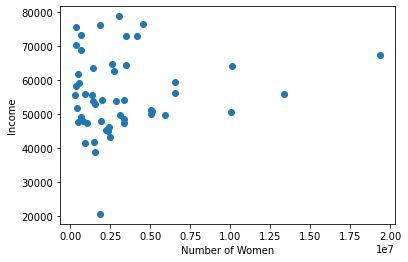

In [473]:
plt.clf()

plt.scatter(us_census['Women'] , us_census['Income'])
plt.xlabel('Number of Women')
plt.ylabel('Income')
plt.show()

### Histograms of Races
13.
Now, your boss wants you to make a bunch of histograms out of the race data that you have. Look at the .columns again to see what the race categories are.

In [474]:
us_census.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'Men', 'Women'],
      dtype='object')

14.
Try to make a histogram for each one!

You will have to get the columns into numerical format, and those percentage signs will have to go.

Don’t forget to fill the nan values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn’t hurt to check for duplicates again.

In [475]:
us_census.isna().any()

State       False
TotalPop    False
Hispanic    False
White       False
Black       False
Native      False
Asian       False
Pacific      True
Income      False
Men         False
Women       False
dtype: bool

In [476]:
us_census['Pacific'].fillna(0 , inplace = True)

In [477]:
us_census = us_census.replace('%' , '', regex = True)

In [478]:
us_census.loc[:,'Hispanic' : 'Pacific' ] = us_census.loc[:,'Hispanic' : 'Pacific'].apply(pd.to_numeric)

In [479]:
# since our numbers in race columns were percentages of total population, we multiply them by total population and divide by 100

us_census.loc[:,'Hispanic' : 'Pacific' ] = us_census.loc[:,'Hispanic' : 'Pacific'].apply(lambda x : x*us_census['TotalPop']/100)

In [480]:
us_census.dtypes

State        object
TotalPop      int64
Hispanic    float64
White       float64
Black       float64
Native      float64
Asian       float64
Pacific     float64
Income      float64
Men           int64
Women       float64
dtype: object

In [481]:
us_census.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
dtype: bool

Text(0, 0.5, 'Number of States')

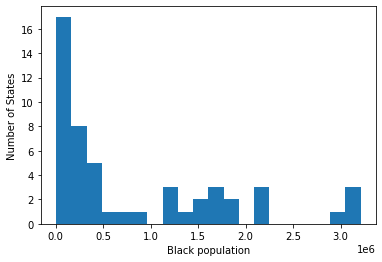

In [482]:
plt.clf()

plt.hist(us_census['Black'] , bins = 20) 

plt.xlabel('Black population') 
plt.ylabel('Number of States')

Text(0, 0.5, 'Number of States')

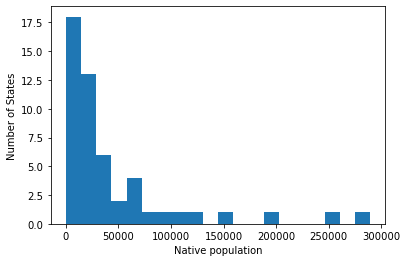

In [483]:
plt.clf()

plt.hist(us_census['Native'] , bins = 20) 

plt.xlabel('Native population') 
plt.ylabel('Number of States')

Text(0, 0.5, 'Number of States')

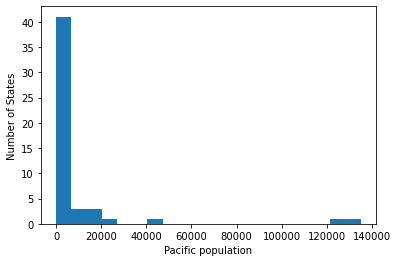

In [484]:
plt.clf()

plt.hist(us_census['Pacific'] , bins = 20) 

plt.xlabel('Pacific population') 
plt.ylabel('Number of States')

Text(0, 0.5, 'Number of States')

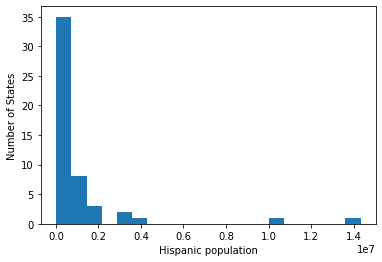

In [485]:
plt.clf()

plt.hist(us_census['Hispanic'] , bins = 20) 

plt.xlabel('Hispanic population') 
plt.ylabel('Number of States')

Text(0, 0.5, 'Number of States')

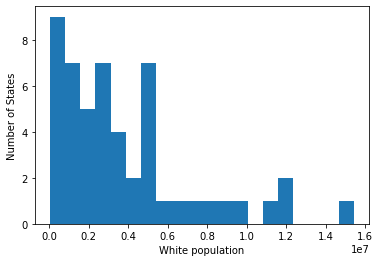

In [486]:
plt.clf()

plt.hist(us_census['White'] , bins = 20) 

plt.xlabel('White population') 
plt.ylabel('Number of States')

Text(0, 0.5, 'Number of States')

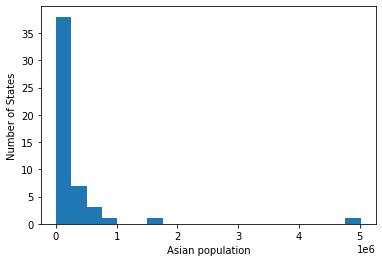

In [487]:
plt.clf()

plt.hist(us_census['Asian'] , bins = 20) 

plt.xlabel('Asian population') 
plt.ylabel('Number of States')

### Get Creative
15.
Phew. You’ve definitely impressed your boss on your first day of work.

But is there a way you really convey the power of pandas and Python over the drudgery of csv and Excel?

Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you’ve been searching for.

In [488]:
us_census.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'Men', 'Women'],
      dtype='object')

In [489]:
Black = us_census['Black']
White = us_census['White']
Native = us_census['Native']
Pacific = us_census['Pacific']
Asian = us_census['Asian']
Hispanic = us_census['Hispanic']
Men = us_census['Men']
Women = us_census['Women'] 
Income = us_census['Income']
States = us_census['State']
Pop = us_census['TotalPop']

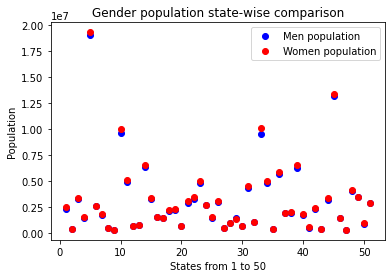

In [490]:
# Comparing Populations of Men & Women in all the states:

plt.clf()

states_index = range(1, len(States) + 1)

plt.plot(states_index , Men , 'bo' , label = "Men population")
plt.plot(states_index , Women, 'ro' , label = "Women population")
plt.title('Gender population state-wise comparison')
plt.xlabel('States from 1 to 50')
plt.ylabel('Population')
plt.legend()

plt.show()

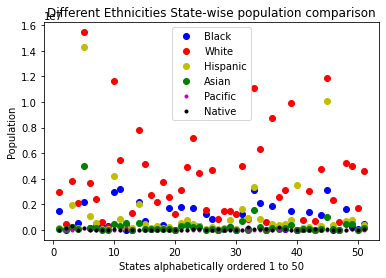

In [491]:
# Comparing number of people of different ethnicities in all states

plt.clf()

plt.plot(states_index , Black , 'bo' , label = 'Black')
plt.plot(states_index , White, 'ro' , label = 'White')
plt.plot(states_index , Hispanic , 'yo' , label = 'Hispanic')
plt.plot(states_index , Asian, 'go' , label = 'Asian')
plt.plot(states_index , Pacific , 'm.' , label = 'Pacific')
plt.plot(states_index , Native, 'k.' , label = 'Native')

plt.title('Different Ethnicities State-wise population comparison')
plt.xlabel('States alphabetically ordered 1 to 50')
plt.ylabel('Population')
plt.legend()

plt.show()

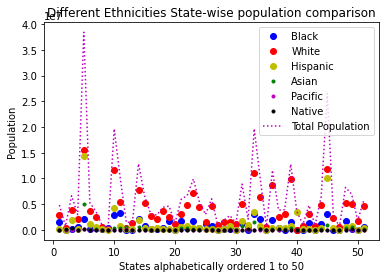

In [492]:
plt.clf()

plt.plot(states_index , Black , 'bo' , label = 'Black')
plt.plot(states_index , White, 'ro' , label = 'White')
plt.plot(states_index , Hispanic , 'yo' , label = 'Hispanic')
plt.plot(states_index , Asian, 'g.' , label = 'Asian')
plt.plot(states_index , Pacific , 'm.' , label = 'Pacific')
plt.plot(states_index , Native, 'k.' , label = 'Native')
plt.plot(states_index  , Pop , ':m' , label = 'Total Population')

plt.title('Different Ethnicities State-wise population comparison')
plt.xlabel('States alphabetically ordered 1 to 50')
plt.ylabel('Population')
plt.legend()

plt.show()

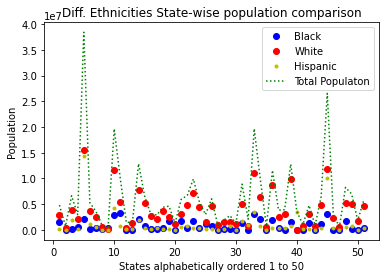

In [493]:
plt.clf()

plt.plot(states_index , Black , 'bo' , label = 'Black')
plt.plot(states_index , White, 'ro' , label = 'White')
plt.plot(states_index , Hispanic , 'y.' , label = 'Hispanic')
plt.plot(states_index , Pop , ':g' , label = 'Total Populaton')

plt.title('Diff. Ethnicities State-wise population comparison')
plt.xlabel('States alphabetically ordered 1 to 50')
plt.ylabel('Population')
plt.legend()

plt.show()

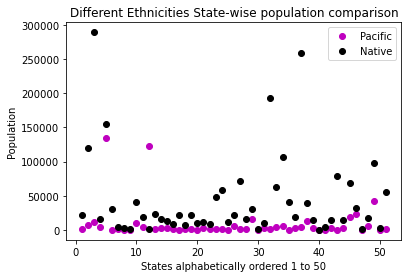

In [494]:
plt.clf()


plt.plot(states_index , Pacific , 'mo' , label = 'Pacific')
plt.plot(states_index , Native, 'ko' , label = 'Native')

plt.title('Different Ethnicities State-wise population comparison')
plt.xlabel('States alphabetically ordered 1 to 50')
plt.ylabel('Population')
plt.legend()

plt.show()

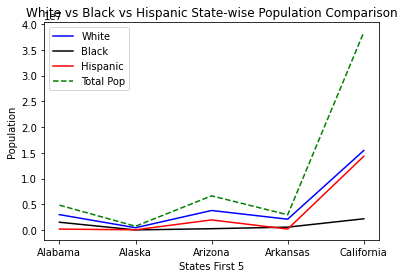

In [495]:
# Comparing populations of Blacks , Whites and Hispanics in first 5 states:

plt.clf()

plt.plot(States[:5], White[:5], 'b' , label = 'White')
plt.plot(States[:5], Black[:5], 'k' , label = 'Black')
plt.plot(States[:5], Hispanic[:5] , 'r' , label = 'Hispanic')
plt.plot(State[:5] , Pop[:5] , '--g' , label = 'Total Pop' )
plt.title('White vs Black vs Hispanic State-wise Population Comparison')
plt.xlabel('States First 5')
plt.ylabel('Population')
plt.legend()

plt.show()

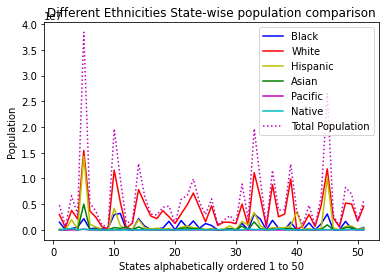

In [496]:
plt.clf()

plt.plot(states_index , Black , 'b' , label = 'Black')
plt.plot(states_index , White, 'r' , label = 'White')
plt.plot(states_index , Hispanic , 'y' , label = 'Hispanic')
plt.plot(states_index , Asian, 'g' , label = 'Asian')
plt.plot(states_index , Pacific , 'm' , label = 'Pacific')
plt.plot(states_index , Native, 'c' , label = 'Native')
plt.plot(states_index  , Pop , ':m' , label = 'Total Population')

plt.title('Different Ethnicities State-wise population comparison')
plt.xlabel('States alphabetically ordered 1 to 50')
plt.ylabel('Population')
plt.legend()

plt.show()

In [497]:
# Comparing populations of different ethnicities in California

California = us_census[States == 'California']
California

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Men,Women
4,California,38421464,1.432808e+07,1.545149e+07,2.181339e+06,155719.143661,5.014859e+06,135017.014343,67264.782303,19087135,19334329.0


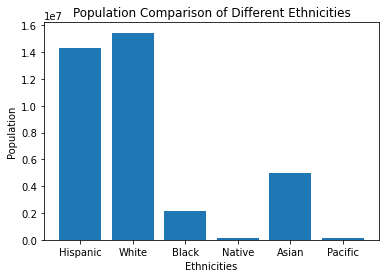

In [498]:
Ethnicities = California.columns[2:8]
Populations = California.values[:, 2:8].reshape(6,)

plt.bar(Ethnicities , Populations)
plt.title('Population Comparison of Different Ethnicities')
plt.xlabel('Ethnicities')
plt.ylabel('Population')

plt.show()

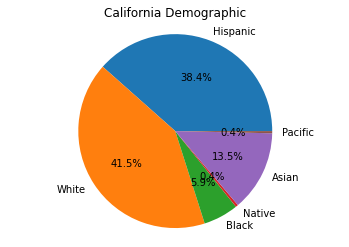

In [499]:
# Making a pie chart of california's different ethnicities:

plt.pie(Populations, labels = Ethnicities ,autopct='%1.1f%%')
plt.title('California Demographic')
plt.axis('equal')
plt.show()

In [500]:
#####-----------------------------------------------------------------------------------------------------------#####

# PART 2:

## LEARN DATA ANALYSIS WITH PANDAS
Petal Power Inventory
You’re the lead data analyst for a chain of gardening stores called Petal Power. Help them analyze their inventory!

Answer Customer Emails
1.
Data for all of the locations of Petal Power is in the file inventory.csv. Load the data into a DataFrame called inventory.

In [501]:
import pandas as pd

inventory = pd.read_csv('Assignment/inventory.csv')

2.
Inspect the first 10 rows of inventory

In [502]:
inventory[:10]

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


3.
The first 10 rows represent data from your Staten Island location. Select these rows and save them to staten_island.

In [503]:
staten_island = inventory[:10].copy()

4.
A customer just emailed you asking what products are sold at your Staten Island location. Select the column product_description from staten_island and save it to the variable product_request.

In [504]:
product_request = staten_island['product_description']

5.
Another customer emails to ask what types of seeds are sold at the Brooklyn location.

Select all rows where location is equal to Brooklyn and product_type is equal to seeds and save them to the variable seed_request

In [505]:
seed_request = inventory[(inventory['location'] == 'Brooklyn')
                                 &
                          (inventory['product_type'] == 'seeds')]

Inventory
6.
Add a column to inventory called in_stock which is True if quantity is greater than 0 and False if quantity equals 0.

In [506]:
inventory['in_stock'] = inventory['quantity'] > 0

7.
Petal Power wants to know how valuable their current inventory is.

Create a column called total_value that is equal to price multiplied by quantity.

In [507]:
inventory['total_value'] = inventory['price']*inventory['quantity']

8.
The Marketing department wants a complete description of each product for their catalog.

The following lambda function combines product_type and product_description into a single string:

combine_lambda = lambda row: \
    '{} - {}'.format(row.product_type,
                     row.product_description)
Paste this function into script.py.

In [508]:
combine_lambda = lambda row: '{} - {}'.format(row.product_type, row.product_description)


9.
Using combine_lambda, create a new column in inventory called full_description that has the complete description of each product.


In [509]:
inventory['full_description'] = inventory.apply(combine_lambda, axis = 1)

In [510]:
#####------------------------------------------------------------------------------------------------------------------#####